In [3]:
### Read Data

In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import seaborn as sns
X=np.load('Y.npy.Z.npz')

In [5]:
X['arr_0']

array([[-100.62499999,  -35.12499948,  -48.62500033, ...,  -84.37499727,
          -0.37499999,   60.12500106],
       [  62.25000136,  -57.1249998 ,   59.24999922, ...,  -18.8749997 ,
          34.62499937,  167.1250007 ],
       [  99.25000023, -176.0846274 , -168.00000095, ...,   -7.78257561,
          11.25000003,  -89.12500025],
       ..., 
       [   0.        ,    0.        ,    0.        , ...,   66.62500273,
          26.75000093,   33.08333576],
       [   0.        ,    0.        ,    0.        , ...,  -22.62500014,
         270.62501001,  121.49999638],
       [ -77.12500202,   15.62499965, -192.37500101, ...,  -83.21564987,
          70.85782456,  -50.2499997 ]])

In [6]:
import pandas as pd
X=pd.DataFrame(X['arr_0'])
X.shape

(1301, 60000)

In [7]:
import numpy as np
train = np.load('train_1.npz')
data = pd.DataFrame(train['data'])
label = pd.DataFrame(train['label'])

In [8]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,59990,59991,59992,59993,59994,59995,59996,59997,59998,59999
0,-100.625000,-35.124999,-48.625000,-7.875000,23.875000,35.500000,-73.125000,49.250000,-44.124999,36.250000,...,34.125002,-3.999999,-12.999998,18.625000,-13.125000,37.125000,-22.625001,-84.374997,-0.375000,60.125001
1,62.250001,-57.125000,59.249999,19.750000,-8.125000,-68.249999,-29.624999,175.625002,-15.565411,78.125000,...,5.250004,-207.375007,-2.375000,74.375000,46.625000,39.250000,-43.874999,-18.875000,34.624999,167.125001
2,99.250000,-176.084627,-168.000001,153.500003,-30.499999,197.000000,36.419259,-70.249999,29.625001,104.875001,...,90.875000,105.532576,-129.250000,117.875001,-33.875000,-22.625000,-70.815152,-7.782576,11.250000,-89.125000
3,-120.097525,705.249995,665.249993,-52.097519,10.749999,72.847524,-156.570039,19.500002,30.250004,72.875003,...,-19.750001,-96.249997,73.999999,101.125002,-29.250000,-63.249999,-57.000000,122.388558,-12.249999,19.874998
4,-87.568298,267.125000,-213.681702,178.250000,121.875000,-50.193298,176.500000,-14.375000,-113.250000,183.068298,...,-185.000003,248.208936,-636.499998,108.875004,79.833032,43.500001,-149.625001,241.749997,-355.250000,264.583035


### convert binary to integer

In [9]:
label=pd.Series(np.ravel(label.astype(int)))
label.shape

(1301,)

In [10]:
label.shape

(1301,)

In [11]:
from sklearn.decomposition import PCA
pca = PCA()
pca_results=pca.fit(data)
# Print the components and the amount of variance in the data contained in each dimension
print( 'PCA components:\n{}'.format(pca.components_[:,0]))
type(pca.components_[:,0])
print(' PCA explained variance ratio:\n{}'.format(pca.explained_variance_ratio_[:4]*100))

PCA components:
[ 0.00154117 -0.001889    0.0003281  ..., -0.00230139  0.00037645
 -0.00430309]
 PCA explained variance ratio:
[ 0.28525631  0.27528707  0.25941352  0.25577498]


### Looking at Explained Variance (for components=components)

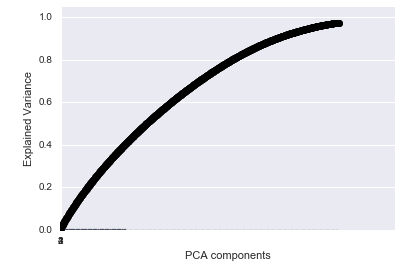

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
components=1000

%matplotlib inline


# create an x-axis variable for each pca component
x = np.arange(1,components+1)

# plot the cumulative variance
plt.plot(x, np.cumsum(pca.explained_variance_ratio_[0:components]), '-o', color='black')

# plot the components' variance
plt.bar(x, pca.explained_variance_ratio_[0:components], align='center', alpha=0.5)

# plot styling
plt.ylim(0, 1.05)
#plt.annotate('Cumulative\nexplained\nvariance',
 #            xy=(3.7, .88), arrowprops=dict(arrowstyle='->'), xytext=(4.5, .6))
for i,j in zip(x, np.cumsum(pca.explained_variance_ratio_[0:4])):
    plt.annotate(str(j.round(2)),xy=(i+.2,j-.02))
plt.xticks(range(1,5))
plt.xlabel('PCA components')
plt.ylabel('Explained Variance')
plt.show()

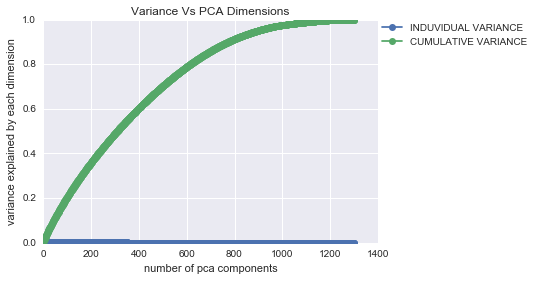

In [13]:
import seaborn as sns
plt.plot(pca.explained_variance_ratio_,marker='o',LABEL="INDUVIDUAL VARIANCE")
plt.xlabel("number of pca components")
plt.ylabel("variance explained by each dimension")
plt.title("Variance Vs PCA Dimensions")
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='o',LABEL="CUMULATIVE VARIANCE")
plt.legend(bbox_to_anchor=(1.00, 1), loc=2, borderaxespad=0.)

### Ratio of seizure: not seizure

In [20]:
#label.columns=['label']
label.value_counts()

0    1152
1     149
dtype: int64

### Sample AUC

In [50]:
import numpy as np
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
#roc_auc_score(y_true, y_scores)

### Model Building

In [40]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print ("ROC score    : {:.4f}.".format(roc_auc_score(np.array(target.values), np.array(y_pred))))
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    return  f1_score(target.values, y_pred,pos_label=0)


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    # Print the results of prediction for both training and testing

    print ("F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print ("F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test)))
   # print("Accuracy/Correctly Classified: {:.4f}.".format(metrics.accuracy_score(y_test, predicted)))

### ShuffleSplit Crossvalidation

In [78]:
#  Import any additional functionality you may need here
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
from time import time
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# TODO: Import the three supervised learning models from sklearn
# from sklearn import model_A
from sklearn.linear_model import LogisticRegression
# from sklearn import model_B
from sklearn.svm import SVC
# from skearln import model_C
from sklearn.neighbors import KNeighborsClassifier


#  Set the number of training points
num_train=800

# Set the number of testing points
num_test = data.shape[0] - num_train

#  Shuffle and split the dataset into the number of training and testing points above
rs = cross_validation.ShuffleSplit(1301, n_iter=1,test_size=num_test, random_state=0)
for train_index, test_index in rs:
   # print("TRAIN:", train_index, "TEST:", test_index)
    X_train = data.loc[train_index,]
    X_test = data.loc[test_index,]
    y_train = (label.loc[train_index,].astype(int))
    y_test = label.loc[test_index,].astype(int)
    
clf_A = LogisticRegression()
clf_B = SVC()
clf_C = KNeighborsClassifier(n_neighbors=25,weights='uniform')    
    
    
#X_train,X_test,y_train,y_test=train_test_split(data,label,test_size=num_train,random_state=4)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

#y_train.index

Training set has 800 samples.
Testing set has 501 samples.


### Sanity Check

In [81]:
#y_train=y_train.reset_index()
y_train.value_counts()

0    715
1     85
dtype: int64

In [27]:
type(X_train[:800])

pandas.core.frame.DataFrame

In [28]:
y_train=np.ravel(y_train)
y_train.shape

(800,)

In [82]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


### Testing Model Performance 

In [56]:
clf_A.fit(X_train, y_train)
y_pred = clf_A.predict(X_test)
print ("ROC score    : {:.4f}.".format(roc_auc_score(np.array(y_test), np.array(y_pred))))

ROC score    : 0.4956.


In [59]:
#clf_B.fit(X_train, y_train)
y_pred = clf_B.predict(X_test)
print ("ROC score    : {:.4f}.".format(roc_auc_score(np.array(y_test), np.array(y_pred))))

ROC score    : 0.5000.


In [60]:
#clf_C.fit(X_train, y_train)
y_pred = clf_C.predict(X_test)
print ("ROC score    : {:.4f}.".format(roc_auc_score(np.array(y_test), np.array(y_pred))))

ROC score    : 0.5000.


In [63]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,59990,59991,59992,59993,59994,59995,59996,59997,59998,59999
1180,35.374999,67.249999,19.875000,27.500002,-11.646060,-73.749999,10.500000,8.875000,24.000000,-95.125000,...,-231.749996,-237.499996,42.625001,-205.125003,929.374999,-384.375015,217.999986,-369.000007,-205.125003,-101.125000
768,-177.522870,110.375000,16.125002,-69.125000,-93.374998,-45.374999,-53.874999,111.250001,-151.874999,70.750001,...,164.624998,-107.875000,321.374987,-84.999999,-32.500001,48.000000,26.000000,311.680586,-298.874990,-96.875000
495,155.750000,-97.000001,136.670185,-109.000000,154.874996,-58.250002,-163.625001,27.670180,46.375005,97.750001,...,55.250000,-63.000000,145.125001,-419.124999,90.874999,39.000002,-91.250003,128.735874,381.375001,-117.750001
47,-153.124998,-41.000002,66.625001,82.624999,148.685066,-222.124999,-58.125002,131.249999,-78.874999,13.000000,...,137.000001,-86.375000,952.750000,-487.500000,-295.250000,522.875000,-176.875000,-167.625000,-270.625000,-489.750000
746,-180.429131,31.375001,48.749998,189.750006,-493.875006,88.124998,40.249999,105.000003,229.070869,-231.750001,...,-86.789199,108.125001,75.999995,142.000004,52.000002,192.296601,-16.749999,101.500000,-101.625002,59.414196


### Logistic Regression

In [41]:
train_predict(clf_A, X_train[:800], pd.Series(y_train[:800]), X_test, pd.Series(y_test))

Training a LogisticRegression using a training set size of 800. . .
Trained model in 63.4620 seconds
ROC score for training set: 0.9824.
Made predictions in 0.0810 seconds.
F1 score for training set: 0.9979.
ROC score for training set: 0.4956.
Made predictions in 0.0630 seconds.
F1 score for test set: 0.6769.


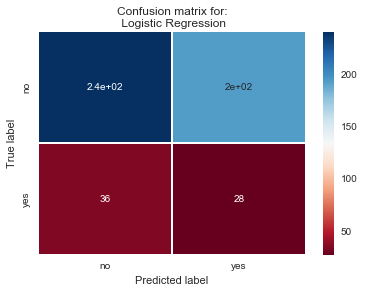

In [30]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for a model
model = clf_A
cm = confusion_matrix(y_test.values, model.predict(X_test))

# view with a heatmap
sns.heatmap(cm, annot=True, cmap='RdBu', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'], linewidth=.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for:\n{}'.format(" Logistic Regression"));

### SVM

In [42]:
train_predict(clf_B, X_train[:800], pd.Series(y_train[:800]), X_test, pd.Series(y_test))

Training a SVC using a training set size of 800. . .
Trained model in 51.1920 seconds
ROC score for training set: 0.9824.
Made predictions in 48.3410 seconds.
F1 score for training set: 0.9979.
ROC score for training set: 0.5000.
Made predictions in 30.3770 seconds.
F1 score for test set: 0.9318.


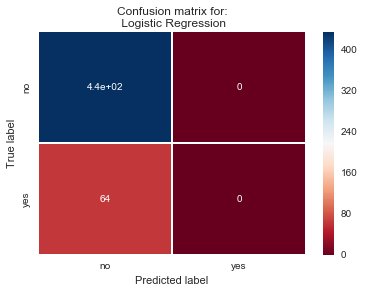

In [32]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for a model
model = clf_B
cm = confusion_matrix(y_test.values, model.predict(X_test))

# view with a heatmap
sns.heatmap(cm, annot=True, cmap='RdBu', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'], linewidth=.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for:\n{}'.format(" Logistic Regression"));

### KNN

In [43]:
train_predict(clf_C, X_train[:800], y_train[:800], X_test, y_test)

Training a KNeighborsClassifier using a training set size of 800. . .
Trained model in 2.4310 seconds
ROC score for training set: 0.5000.
Made predictions in 70.5370 seconds.
F1 score for training set: 0.9439.
ROC score for training set: 0.5000.
Made predictions in 44.1830 seconds.
F1 score for test set: 0.9318.


In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for a model
model = clf_C
cm = confusion_matrix(y_test.values, model.predict(X_test))

# view with a heatmap
sns.heatmap(cm, annot=True, cmap='RdBu', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'], linewidth=.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for:\n{}'.format(" Logistic Regression"));

### GRIDSEARCH

In [83]:
from sklearn import grid_search
from sklearn.linear_model import LogisticRegression


clf_A1=grid_search.GridSearchCV(cv=4,estimator=LogisticRegression(C=1.0,penalty='l2'),
       param_grid={'C':[0.01,1,10,1000]},n_jobs=-1)
clf_A1.fit(X_train,y_train)
print (clf_A1.best_params_)
print (clf_A1.best_score_)
#train_predict(clf_A1, X_train, y_train, X_test, y_test)

D:\Anaconda3\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
D:\Anaconda3\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
D:\Anaconda3\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
D:\Anaconda3\lib\site-packages\skl

{'C': 10}
0.55125


In [84]:
train_predict(clf_A1, X_train, y_train, X_test, y_test)

Training a GridSearchCV using a training set size of 800. . .


D:\Anaconda3\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
D:\Anaconda3\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
D:\Anaconda3\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
D:\Anaconda3\lib\site-packages\skl

Trained model in 585.2795 seconds
ROC score for training set: 0.9824.
Made predictions in 0.1280 seconds.
F1 score for training set: 0.9979.
ROC score for training set: 0.4646.
Made predictions in 0.0680 seconds.
F1 score for test set: 0.6850.


In [ ]:
from sklearn.svm import SVC

from sklearn.grid_search import GridSearchCV

clf_B1=SVC()
param_grids = {"kernel":['rbf'],
               'gamma': [ 1e-4, 1e-5, 1e-6],
               'C': [1, 400, 500, 600, 700],
               }

clf_B1 = GridSearchCV(SVC(), param_grid= param_grids, cv=10,n_jobs= -1)
clf_B1.fit(X_train,y_train)
train_predict(clf_B1,X_train_400 ,y_train_400, X_test, y_test)